In [1]:
import networkx as nx

In [2]:
positive_G = nx.read_graphml("./data/positive.graphml")
negative_G = nx.read_graphml("./data/negative.graphml")

In [3]:
#Renaming
positive_nodes_map = positive_G.nodes.data()
negative_nodes_map = negative_G.nodes.data()

renaming_positive_map = {}
for positive_node in positive_nodes_map:
    positive_G.nodes[positive_node[0]]['ionization_mode'] = "positive"
    renaming_positive_map[positive_node[0]] = "positive-" + positive_node[0]

renaming_negative_map = {}
for negative_node in negative_nodes_map:
    negative_G.nodes[negative_node[0]]['ionization_mode'] = "negative"
    renaming_negative_map[negative_node[0]] = "negative-" + negative_node[0]
    
positive_G = nx.relabel_nodes(positive_G, renaming_positive_map)
negative_G = nx.relabel_nodes(negative_G, renaming_negative_map)

In [4]:
positive_nodes_map = positive_G.nodes.data()
negative_nodes_map = negative_G.nodes.data()

In [5]:
plot_values = []

new_edges = []
for positive_node in positive_nodes_map:
    positive_id = positive_node[0]
    positive_mz = float(positive_node[1]["precursor mass"])
    positive_rt = float(positive_node[1]["RTMean"])
    positive_compound = ""
    
    if "Compound_Name" in positive_node[1]:
        positive_compound = positive_node[1]["Compound_Name"]
    
    for negative_node in negative_nodes_map:
        negative_id = negative_node[0]
        negative_mz = float(negative_node[1]["precursor mass"])
        negative_rt = float(negative_node[1]["RTMean"])
        negative_compound = ""
        
        if "Compound_Name" in negative_node[1]:
            negative_compound = negative_node[1]["Compound_Name"]
        
        mz_delta = positive_mz - negative_mz
        rt_delta = abs(positive_rt - negative_rt)
        
        expected_mz_delta = 1.007276 * 2
        
        mz_delta_error = abs(mz_delta - expected_mz_delta)
        mz_delta_error_ppm = mz_delta_error/negative_mz * 1000000
        
        if mz_delta < 1.9 or mz_delta > 2.1 or rt_delta > 30 or mz_delta_error_ppm > 20:
        #if mz_delta < 1.9 or mz_delta > 2.1 or rt_delta > 30:
            continue
            
        plot_values.append(rt_delta)
        
        new_edges.append([positive_id, negative_id])

        #print(mz_delta_error, mz_delta_error_ppm, positive_id, negative_id, mz_delta, rt_delta, positive_compound, "++++++" ,negative_compound)
        
        #if mz_delta > 0 and mz_delta < 5 and rt_delta < 0.5 and len(positive_compound) > 3 and len(negative_compound) > 3:
        #    print(positive_id, negative_id, mz_delta, rt_delta, positive_compound, "++++++" ,negative_compound)
        

In [6]:
#Merging Networks
merged_network = nx.compose(positive_G, negative_G)

In [9]:
#Adding new edges
for new_edge in new_edges:
    merged_network.add_edge(new_edge[0], new_edge[1], EdgeType="IonMode")

In [10]:
#Saving out data
nx.write_graphml(merged_network, "merged_network.graphml")

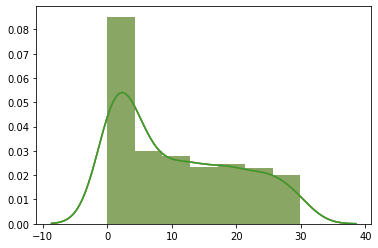

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(plot_values)
plt.show()

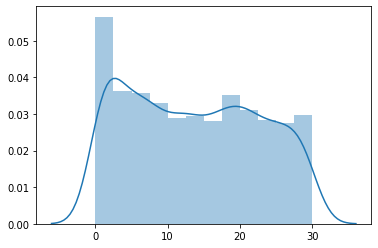

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(plot_values)
plt.show()